In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import warnings

In [71]:
# Read Data
file_path = r"C:\Users\Ömer\Desktop\SteamData\converted_data.csv"

data = pd.read_csv(file_path)


In [72]:
print(data.columns.to_list())


# Remove the semicolon from 'Playtime;' and convert it to numeric
data['Playtime;'] = data['Playtime;'].str.replace(';', '').astype(int)
data['Discount Rate'] = data['Discount Rate'].str.replace('%', '').replace('N/A', '0').astype(float)
data['Price'] = data['Price'].str.replace('N/A', '').str.replace('$', '').astype(float)
data['Like Ratio'] = data['Like Ratio'].str.replace('N/A', '').str.replace('%', '').astype(float)
data['Playtime;'] = data['Playtime;'] / 60


# Sort the DataFrame based on the cleaned 'Playtime;' column in descending order
sortedPlaytime = data.sort_values(by='Playtime;', ascending=False)

playedData = data[data['Playtime;'] != 0]
sortedPDPT = playedData.sort_values(by='Playtime;', ascending=False)

numeric_summary = data.describe()
print(numeric_summary)



['AppID', 'App Name', 'Discount Rate', 'Price', 'Like Ratio', 'Release Date', 'Playtime;']
              AppID  Discount Rate       Price  Like Ratio    Playtime;
count  2.830000e+02     217.000000  217.000000  217.000000   283.000000
mean   7.954143e+05     -61.700461    4.608157   85.901797    14.029564
std    5.560509e+05      20.946529    5.043012    8.903609    91.169633
min    7.000000e+01     -95.000000    0.440000   38.640000     0.000000
25%    3.364650e+05     -80.000000    1.490000   81.640000     0.000000
50%    7.116600e+05     -67.000000    2.990000   88.100000     0.000000
75%    1.173415e+06     -46.000000    5.590000   91.930000     1.950000
max    2.319470e+06     -10.000000   29.990000   97.710000  1197.200000


Correlation between Playtime and Price: 0.2434832906239111
Correlation between Playtime and Like Ratio: 0.034675728113748874
Correlation between Playtime and Release Date: -0.1795748059570653
Correlation between Discount Rate and Playtime: -0.005324991210015897


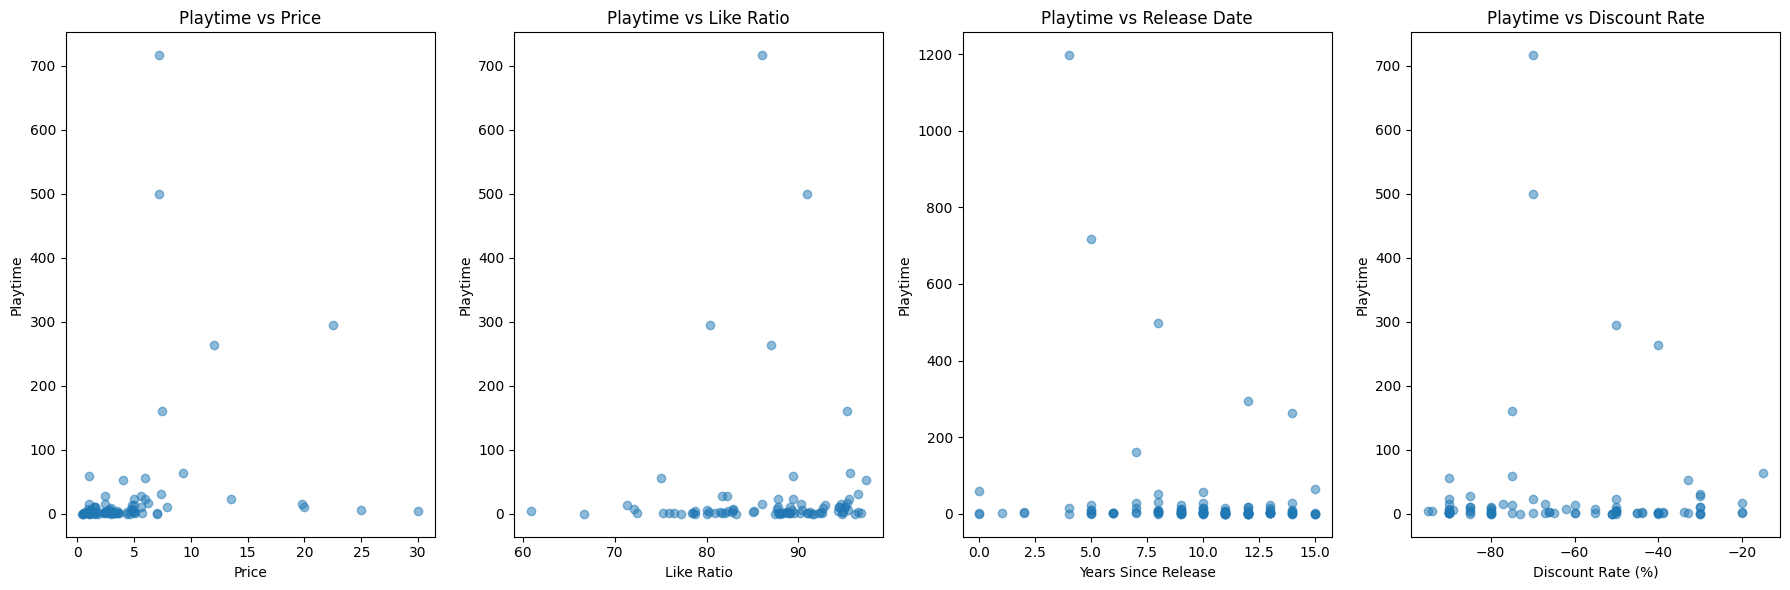

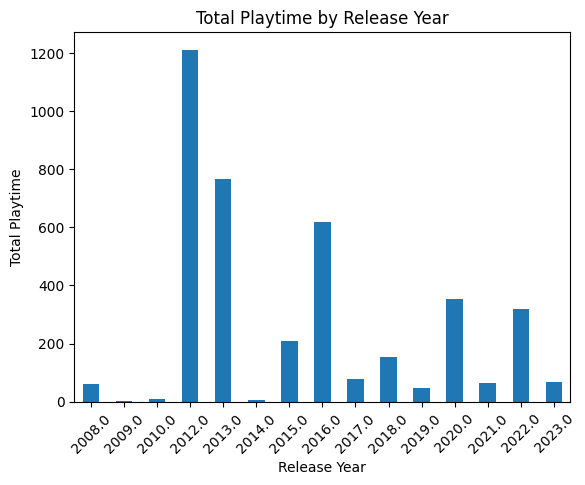

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'playedData' is already loaded

# Create a clear copy of the DataFrame to avoid SettingWithCopyWarning
playedData_copy = playedData.copy()

# Convert 'Release Date' to datetime format and extract year
playedData_copy['Release Date'] = pd.to_datetime(playedData_copy['Release Date'], format='%b %Y', errors='coerce')
playedData_copy['Release Year'] = playedData_copy['Release Date'].dt.year

# Convert 'Release Year' to a numeric value (e.g., years since the earliest release date)
earliest_year = playedData_copy['Release Year'].min()
playedData_copy['Years Since Release'] = playedData_copy['Release Year'] - earliest_year

# Calculate Correlations
correlation_price = playedData_copy['Playtime;'].corr(playedData_copy['Price'])
correlation_like_ratio = playedData_copy['Playtime;'].corr(playedData_copy['Like Ratio'])
correlation_release_date = playedData_copy['Playtime;'].corr(playedData_copy['Years Since Release'])

# Print out the correlation values
print("Correlation between Playtime and Price:", correlation_price)
print("Correlation between Playtime and Like Ratio:", correlation_like_ratio)
print("Correlation between Playtime and Release Date:", correlation_release_date)

# Visualizing Correlations
plt.figure(figsize=(18, 6))

# Scatter plot for Playtime vs Price
plt.subplot(1, 4, 1)
plt.scatter(playedData_copy['Price'], playedData_copy['Playtime;'], alpha=0.5)
plt.title('Playtime vs Price')
plt.xlabel('Price')
plt.ylabel('Playtime')

# Scatter plot for Playtime vs Like Ratio
plt.subplot(1, 4, 2)
plt.scatter(playedData_copy['Like Ratio'], playedData_copy['Playtime;'], alpha=0.5)
plt.title('Playtime vs Like Ratio')
plt.xlabel('Like Ratio')
plt.ylabel('Playtime')

# Scatter plot for Playtime vs Release Date
plt.subplot(1, 4, 3)
plt.scatter(playedData_copy['Years Since Release'], playedData_copy['Playtime;'], alpha=0.5)
plt.title('Playtime vs Release Date')
plt.xlabel('Years Since Release')
plt.ylabel('Playtime')

playedDataN = playedData.copy()
# Calculate Correlation
correlation_discount_playtime = playedDataN['Playtime;'].corr(playedDataN['Discount Rate'])

# Print out the correlation value
print("Correlation between Discount Rate and Playtime:", correlation_discount_playtime)
# Bar plot for Playtime by Release Year
plt.subplot(1, 4, 4)
plt.scatter(playedDataN['Discount Rate'], playedDataN['Playtime;'], alpha=0.5)
plt.title('Playtime vs Discount Rate')
plt.xlabel('Discount Rate (%)')
plt.ylabel('Playtime')

plt.tight_layout()
plt.show()





# Visualizing
playtime_by_year = playedData_copy.groupby('Release Year')['Playtime;'].sum()
playtime_by_year.plot(kind='bar', ax=plt.gca())
plt.title('Total Playtime by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Total Playtime')
plt.xticks(rotation=45)
plt.show()


                         App Name  Price   Playtime;  Cost per Hour
156         Europa Universalis IV   7.19  716.300000       0.010038
82              Hearts of Iron IV   7.19  498.900000       0.014412
104                 Mount & Blade   0.99   59.400000       0.016667
141  Mount & Blade II: Bannerlord  11.99  263.600000       0.045486
16      The Witcher® 3: Wild Hunt   7.49  160.900000       0.046551
154               Thief Simulator   1.04   15.600000       0.066667
214                Cyberpunk 2077  22.49  294.300000       0.076419
1                  Stardew Valley   4.01   52.300000       0.076673
196                 Just Cause™ 3   2.39   27.400000       0.087226
249                  We Happy Few   5.99   56.300000       0.106394
134               Bad Dream: Coma   0.89    8.183333       0.108758
20                    Tomb Raider   1.49   11.200000       0.133036
132                       Aragami   1.57   11.200000       0.140179
21                        Outlast   1.57   11.20

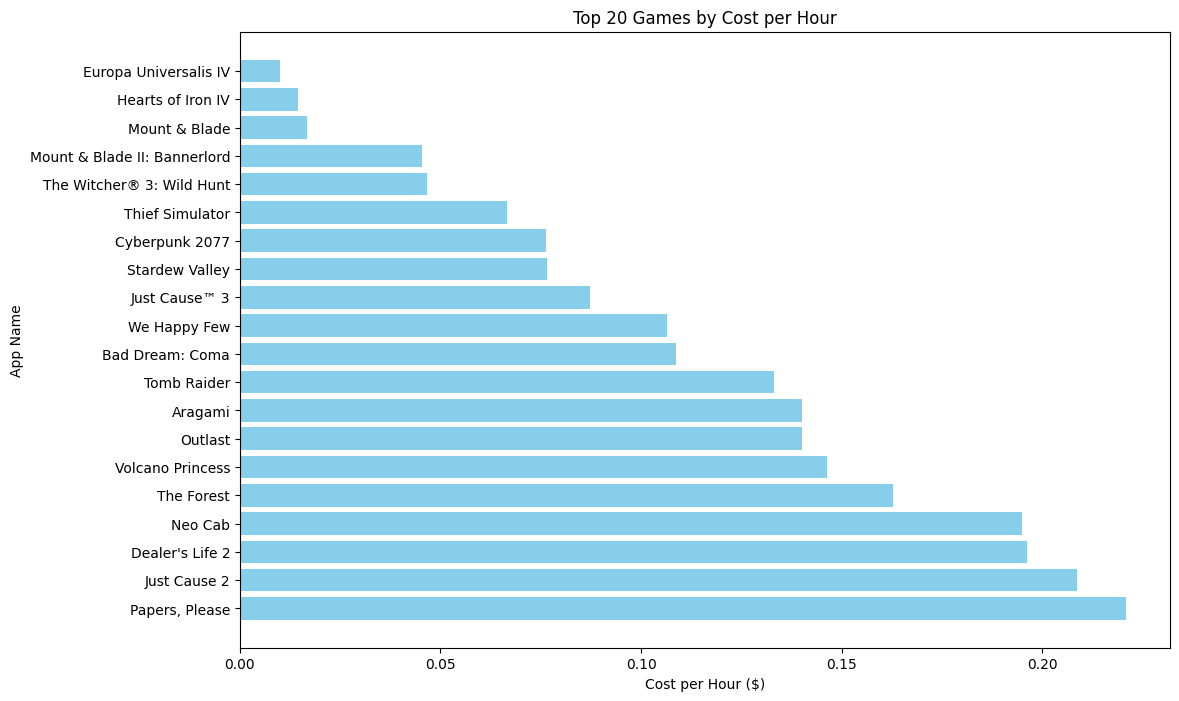

In [74]:
# Cost Per Hour Calculations

playedDataWcph = playedData.copy()

# Calculate Cost per Hour (Price divided by Playtime in hours) and add it to the new DataFrame
playedDataWcph['Cost per Hour'] = playedDataWcph['Price'] / (playedDataWcph['Playtime;'])
playedDataWcph = playedDataWcph.sort_values(by='Cost per Hour')


# Display the data with the new 'Cost per Hour' column
print(playedDataWcph[['App Name', 'Price', 'Playtime;', 'Cost per Hour']].head(20))

# Create a bar plot for the top 20 games by 'Cost per Hour'
top_20_cost_per_hour = playedDataWcph.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_20_cost_per_hour['App Name'], top_20_cost_per_hour['Cost per Hour'], color='skyblue')
plt.xlabel('Cost per Hour ($)')
plt.ylabel('App Name')
plt.title('Top 20 Games by Cost per Hour')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()






                                              App Name  Predicted Playtime
148                                  STEINS;GATE ELITE          156.999598
90               STEINS;GATE: Linear Bounded Phenogram          156.835000
54                                       STEINS;GATE 0           93.928419
23                                         STEINS;GATE           81.273828
146                Horizon Zero Dawn™ Complete Edition           78.179551
203  Re:ZERO -Starting Life in Another World- The P...           77.715136
88                       Zero Escape: The Nonary Games           70.033511
219                        Borderlands: The Pre-Sequel           65.925798
9                                                OMORI           65.727110
157                          Mafia: Definitive Edition           65.656909
275                      Mafia III: Definitive Edition           63.562559
260                       Mafia II: Definitive Edition           62.964928
18                       

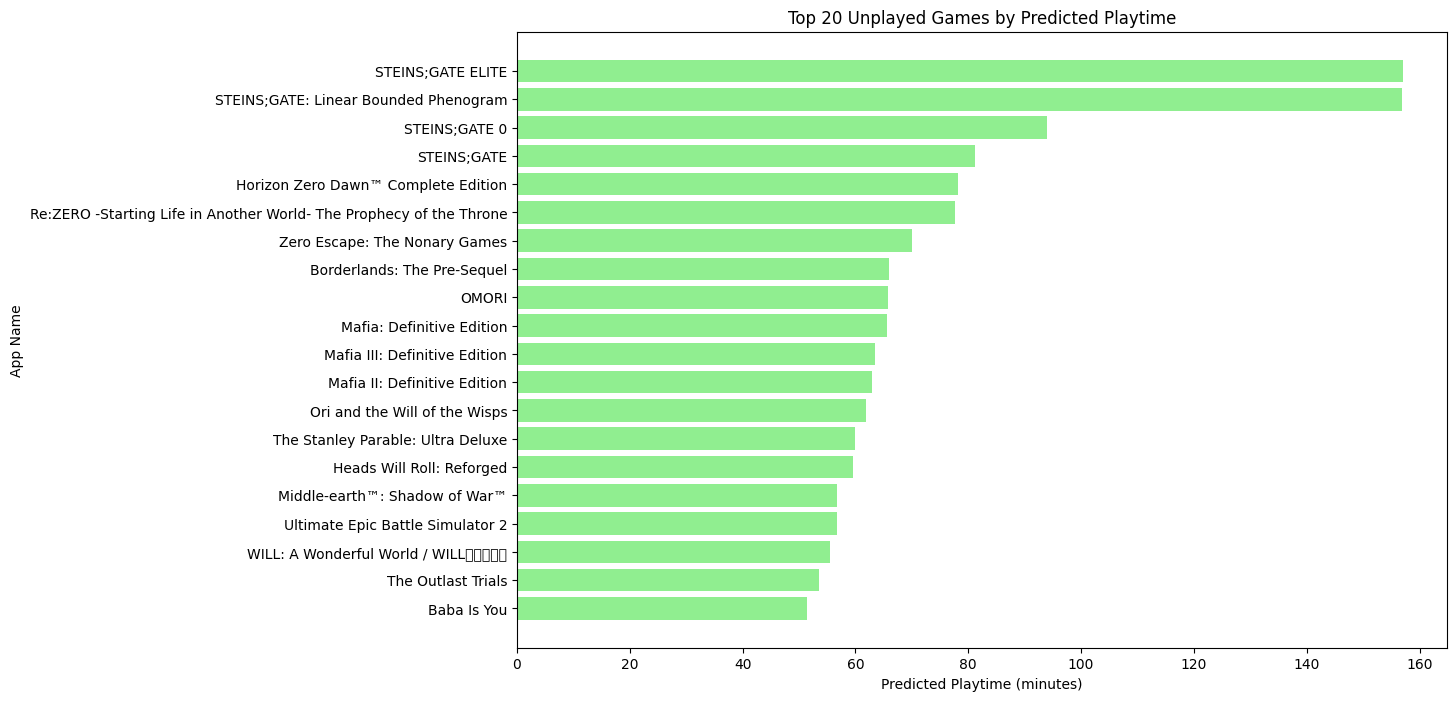

In [75]:
warnings.filterwarnings('ignore', category=UserWarning)

# Splitting the data
played_games = playedDataWcph.copy()
unplayed_games = data[data['Playtime;'] <= 0].copy()

# Selecting features and target for the training data
features = ['Price', 'Discount Rate', 'Like Ratio']  # Excluding 'Cost per Hour'
X_train = played_games[features]
y_train = played_games['Playtime;']

# Handling NaN values in the training features
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Standardizing the training features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Creating and training the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Preparing the unplayed games data (excluding 'Cost per Hour' from the features)
X_test = unplayed_games[features]
X_test_imputed = imputer.transform(X_test)  # Use the same imputer as before
X_test_scaled = scaler.transform(X_test_imputed)  # Use the same scaler as before

# Predicting playtime for unplayed games
unplayed_games['Predicted Playtime'] = model.predict(X_test_scaled)
unplayed_games = unplayed_games.sort_values(by='Predicted Playtime', ascending=False)

# Displaying the predictions
print(unplayed_games[['App Name', 'Predicted Playtime']].head(20))

top_20_unplayed = unplayed_games.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_20_unplayed['App Name'], top_20_unplayed['Predicted Playtime'], color='lightgreen')
plt.xlabel('Predicted Playtime (minutes)')
plt.ylabel('App Name')
plt.title('Top 20 Unplayed Games by Predicted Playtime')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

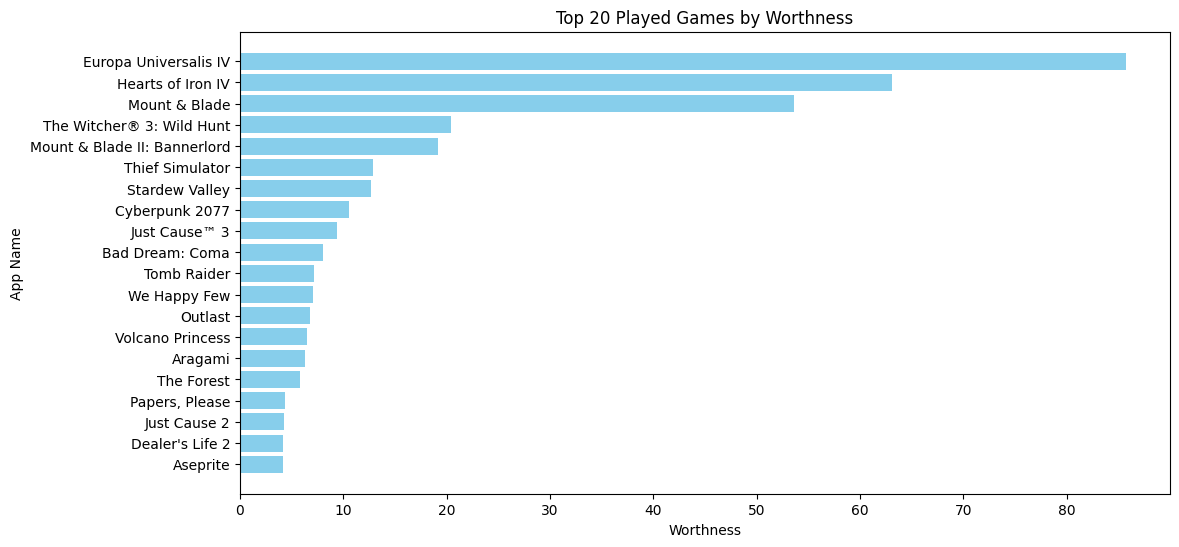

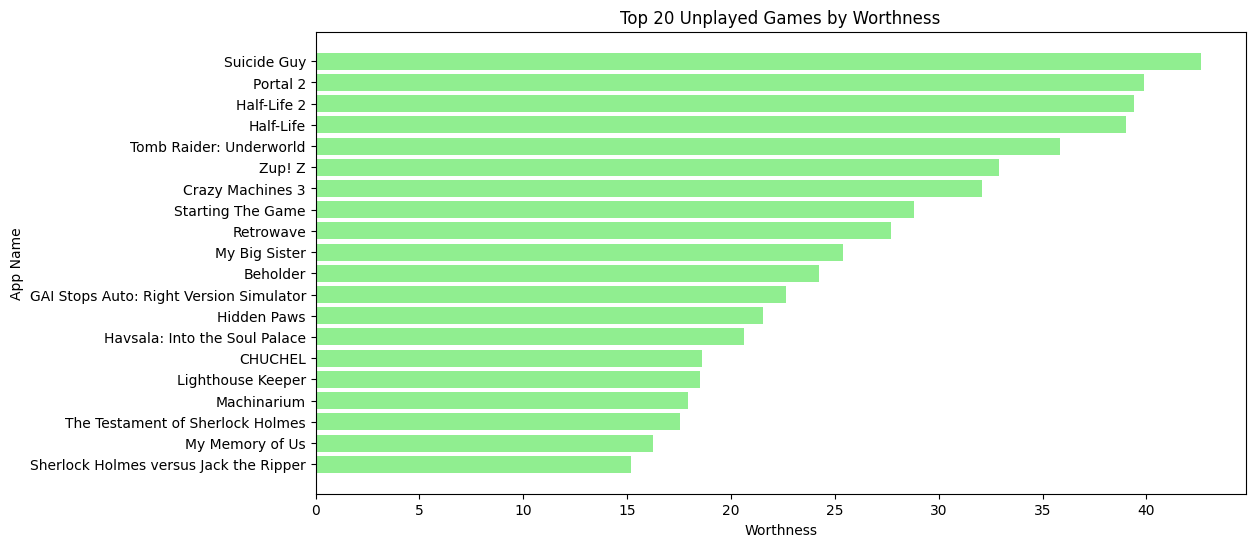

In [76]:

pfPlayed = played_games.copy()
dfUnplayed = unplayed_games.copy()

# Calculate the mean price excluding zero prices
mean_price = data[data['Price'] > 0]['Price'].mean()


# Replace zero prices with the mean price in both datasets
pfPlayed['Price'] = pfPlayed['Price'].replace(0, mean_price)
dfUnplayed['Price'] = dfUnplayed['Price'].replace(0, mean_price)

# Convert 'Like Ratio' to a proportion (assuming it's currently in percentage form)
pfPlayed['Like Ratio'] = pfPlayed['Like Ratio'] / 100
dfUnplayed['Like Ratio'] = dfUnplayed['Like Ratio'] / 100

# Calculate Worthness for both played and unplayed games
pfPlayed['Worthness'] = (pfPlayed['Playtime;'] * pfPlayed['Like Ratio']) / (pfPlayed['Price'])
dfUnplayed['Worthness'] = (dfUnplayed['Predicted Playtime'] * dfUnplayed['Like Ratio']) / (dfUnplayed['Price'])

# Handling division by zero or undefined values if Price is zero
pfPlayed['Worthness'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
dfUnplayed['Worthness'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

pfPlayed = pfPlayed.sort_values(by='Worthness', ascending=False)
dfUnplayed = dfUnplayed.sort_values(by='Worthness', ascending=False)

# Top 10 Played Games
top_10_played = pfPlayed[['App Name', 'Worthness']].head(20)

# Top 10 Unplayed Games
top_10_unplayed = dfUnplayed[['App Name', 'Worthness']].head(20)

# Plotting for Played Games
plt.figure(figsize=(12, 6))
plt.barh(top_10_played['App Name'], top_10_played['Worthness'], color='skyblue')
plt.xlabel('Worthness')
plt.ylabel('App Name')
plt.title('Top 20 Played Games by Worthness')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()

# Plotting for Unplayed Games
plt.figure(figsize=(12, 6))
plt.barh(top_10_unplayed['App Name'], top_10_unplayed['Worthness'], color='lightgreen')
plt.xlabel('Worthness')
plt.ylabel('App Name')
plt.title('Top 20 Unplayed Games by Worthness')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()


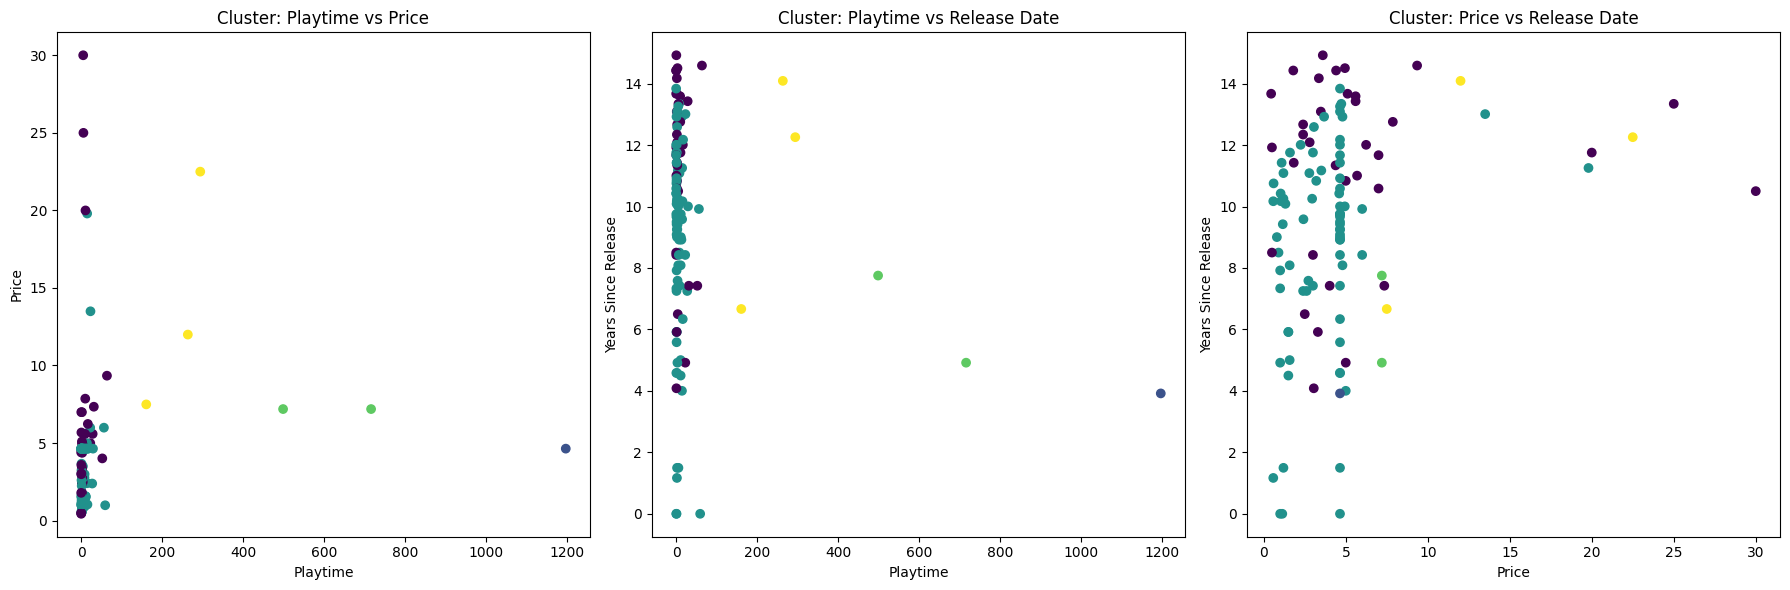

In [77]:
warnings.filterwarnings('ignore')
dataCl = played_games.copy()

# Check and convert 'Like Ratio' to numeric if it's in string format
if dataCl['Like Ratio'].dtype == 'object':
    dataCl['Like Ratio'] = pd.to_numeric(dataCl['Like Ratio'].str.replace('%', ''), errors='coerce')

# Assuming 'dataCl' is your DataFrame and it's already loaded

# Convert 'Release Date' to datetime and then to a numeric value (e.g., years since the earliest release date)
dataCl['Release Date'] = pd.to_datetime(dataCl['Release Date'], errors='coerce')
dataCl['Years Since Release'] = (dataCl['Release Date'] - dataCl['Release Date'].min()).dt.days / 365

# Assuming 'Playtime' is already in a numeric format (e.g., hours)
# If not, convert it here

# Impute missing values
imputer = SimpleImputer(strategy='mean')
all_features = ['Price', 'Discount Rate', 'Like Ratio', 'Playtime;', 'Years Since Release']
dataCl[all_features] = imputer.fit_transform(dataCl[all_features])

# KMeans clustering
kmeans = KMeans(n_clusters=5)  # Example: 5 clusters
clusters = kmeans.fit_predict(dataCl[all_features])

# Add cluster information to the DataFrame
dataCl['Cluster'] = clusters

# Visualizing the clusters
plt.figure(figsize=(18, 6))

# Playtime and Price
plt.subplot(1, 3, 1)
plt.scatter(dataCl['Playtime;'], dataCl['Price'], c=dataCl['Cluster'])
plt.xlabel('Playtime')
plt.ylabel('Price')
plt.title('Cluster: Playtime vs Price')

# Playtime and Release Date
plt.subplot(1, 3, 2)
plt.scatter(dataCl['Playtime;'], dataCl['Years Since Release'], c=dataCl['Cluster'])
plt.xlabel('Playtime')
plt.ylabel('Years Since Release')
plt.title('Cluster: Playtime vs Release Date')

# Price and Release Date
plt.subplot(1, 3, 3)
plt.scatter(dataCl['Price'], dataCl['Years Since Release'], c=dataCl['Cluster'])
plt.xlabel('Price')
plt.ylabel('Years Since Release')
plt.title('Cluster: Price vs Release Date')

plt.tight_layout()
plt.show()

